# Statistiques

## generate dataset for SPC analysis 


In [13]:
import random
import csv

def generate_spc_data_csv(num_points, special_percentage, filename):
    special_count = int(num_points * special_percentage / 100)

    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Time (s)', 'Value1', 'Value2', 'Value3'])

        for i in range(num_points):
            time = i + 1  # Utilisation d'une référence de temps simple (1, 2, 3, ...)
            if i < special_count:
                # Génération de points spéciaux
                value1 = random.uniform(18, 30)  # Plage de valeurs pour les points spéciaux
                value2 = random.uniform(20, 30)  # Plage de valeurs pour les points spéciaux
                value3 = random.uniform(44, 70)  # Plage de valeurs pour les points spéciaux

            else:
                # Génération de points aléatoires
                value1 = random.uniform(20, 28)  # Plage de valeurs pour les points aléatoires
                value2 = random.uniform(20, 30)  # Plage de valeurs pour les points aléatoires
                value3 = random.uniform(44, 70)  # Plage de valeurs pour les points aléatoires

                

            writer.writerow([time, value1, value2, value3])

# Exemple d'utilisation
generate_spc_data_csv(500, 5, 'spc_data.csv')


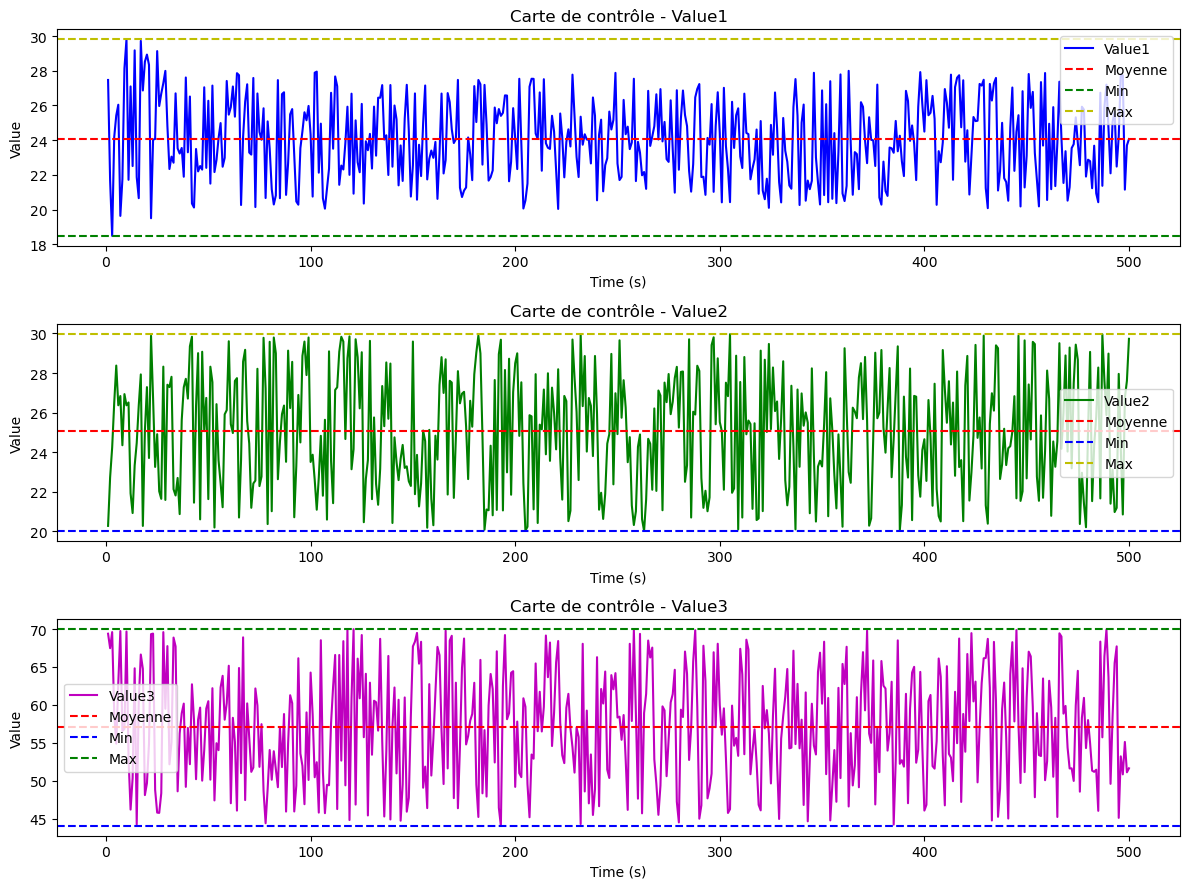

In [15]:
import csv
import matplotlib.pyplot as plt

def read_csv_data(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            time = int(row[0])
            value1 = float(row[1])
            value2 = float(row[2])
            value3 = float(row[3])
            data.append((time, value1, value2, value3))
    return data

def generate_control_charts(data):
    times = [point[0] for point in data]
    value1 = [point[1] for point in data]
    value2 = [point[2] for point in data]
    value3 = [point[3] for point in data]

    plt.figure(figsize=(12, 9))

    # Carte de contrôle pour Value1
    plt.subplot(3, 1, 1)
    plt.plot(times, value1, 'b-', label='Value1')
    plt.axhline(y=sum(value1) / len(value1), color='r', linestyle='--', label='Moyenne')
    plt.axhline(y=min(value1), color='g', linestyle='--', label='Min')
    plt.axhline(y=max(value1), color='y', linestyle='--', label='Max')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title('Carte de contrôle - Value1')
    plt.legend()

    # Carte de contrôle pour Value2
    plt.subplot(3, 1, 2)
    plt.plot(times, value2, 'g-', label='Value2')
    plt.axhline(y=sum(value2) / len(value2), color='r', linestyle='--', label='Moyenne')
    plt.axhline(y=min(value2), color='b', linestyle='--', label='Min')
    plt.axhline(y=max(value2), color='y', linestyle='--', label='Max')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title('Carte de contrôle - Value2')
    plt.legend()

    # Carte de contrôle pour Value3
    plt.subplot(3, 1, 3)
    plt.plot(times, value3, 'm-', label='Value3')
    plt.axhline(y=sum(value3) / len(value3), color='r', linestyle='--', label='Moyenne')
    plt.axhline(y=min(value3), color='b', linestyle='--', label='Min')
    plt.axhline(y=max(value3), color='g', linestyle='--', label='Max')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title('Carte de contrôle - Value3')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
data = read_csv_data('spc_data.csv')
generate_control_charts(data)


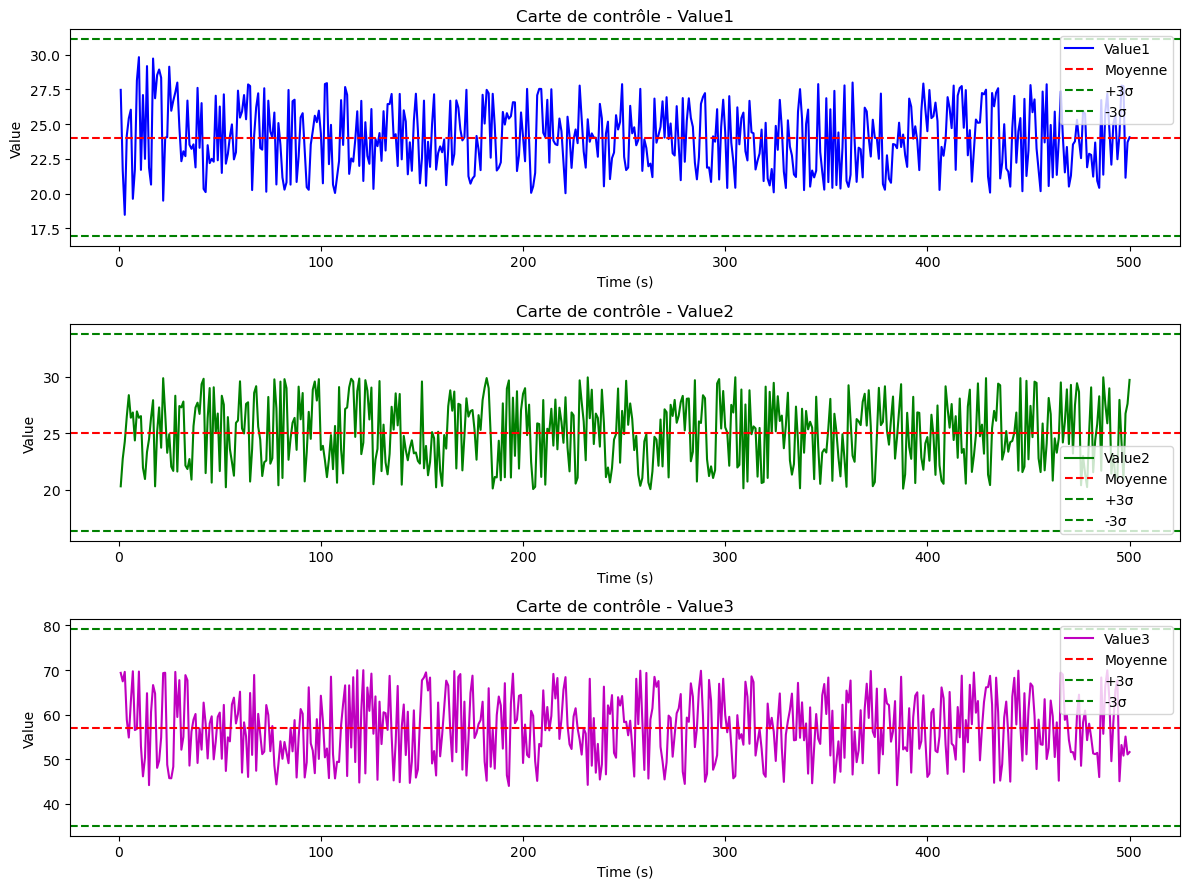

In [20]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def read_csv_data(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            time = int(row[0])
            value1 = float(row[1])
            value2 = float(row[2])
            value3 = float(row[3])
            data.append((time, value1, value2, value3))
    return data

def generate_control_charts(data):
    times = [point[0] for point in data]
    value1 = [point[1] for point in data]
    value2 = [point[2] for point in data]
    value3 = [point[3] for point in data]

    plt.figure(figsize=(12, 9))

    # Calculate mean and standard deviation
    mean_value1 = np.mean(value1)
    std_value1 = np.std(value1)
    mean_value2 = np.mean(value2)
    std_value2 = np.std(value2)
    mean_value3 = np.mean(value3)
    std_value3 = np.std(value3)

    # Carte de contrôle pour Value1
    plt.subplot(3, 1, 1)
    plt.plot(times, value1, 'b-', label='Value1')
    plt.axhline(y=mean_value1, color='r', linestyle='--', label='Moyenne')
    plt.axhline(y=mean_value1 + 3 * std_value1, color='g', linestyle='--', label='+3σ')
    plt.axhline(y=mean_value1 - 3 * std_value1, color='g', linestyle='--', label='-3σ')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title('Carte de contrôle - Value1')
    plt.legend()

    # Carte de contrôle pour Value2
    plt.subplot(3, 1, 2)
    plt.plot(times, value2, 'g-', label='Value2')
    plt.axhline(y=mean_value2, color='r', linestyle='--', label='Moyenne')
    plt.axhline(y=mean_value2 + 3 * std_value2, color='g', linestyle='--', label='+3σ')
    plt.axhline(y=mean_value2 - 3 * std_value2, color='g', linestyle='--', label='-3σ')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title('Carte de contrôle - Value2')
    plt.legend()

    # Carte de contrôle pour Value3
    plt.subplot(3, 1, 3)
    plt.plot(times, value3, 'm-', label='Value3')
    plt.axhline(y=mean_value3, color='r', linestyle='--', label='Moyenne')
    plt.axhline(y=mean_value3 + 3 * std_value3, color='g', linestyle='--', label='+3σ')
    plt.axhline(y=mean_value3 - 3 * std_value3, color='g', linestyle='--', label='-3σ')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title('Carte de contrôle - Value3')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
data = read_csv_data('spc_data.csv')
generate_control_charts(data)


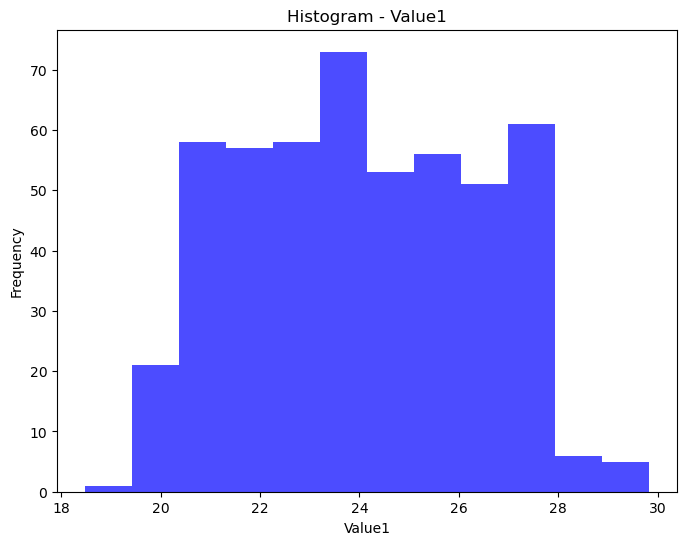

In [16]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def read_csv_data(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            time = int(row[0])
            value1 = float(row[1])
            value2 = float(row[2])
            value3 = float(row[3])
            data.append((time, value1, value2, value3))
    return data

def generate_histogram(data):
    value1 = [point[1] for point in data]

    plt.figure(figsize=(8, 6))

    # Generate histogram
    plt.hist(value1, bins='auto', color='blue', alpha=0.7)
    plt.xlabel('Value1')
    plt.ylabel('Frequency')
    plt.title('Histogram - Value1')

    plt.show()

# Exemple d'utilisation
data = read_csv_data('spc_data.csv')
generate_histogram(data)


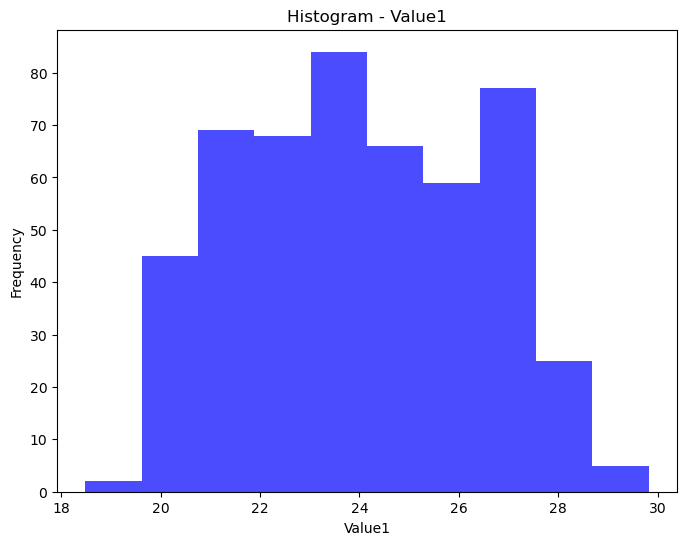

In [17]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def read_csv_data(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            time = int(row[0])
            value1 = float(row[1])
            value2 = float(row[2])
            value3 = float(row[3])
            data.append((time, value1, value2, value3))
    return data

def generate_histogram(data):
    value1 = [point[1] for point in data]

    plt.figure(figsize=(8, 6))

    # Calculate number of bins using Sturges' rule
    num_bins = int(np.ceil(np.log2(len(value1))) + 1)

    # Generate histogram
    plt.hist(value1, bins=num_bins, color='blue', alpha=0.7)
    plt.xlabel('Value1')
    plt.ylabel('Frequency')
    plt.title('Histogram - Value1')

    plt.show()

# Exemple d'utilisation
data = read_csv_data('spc_data.csv')
generate_histogram(data)


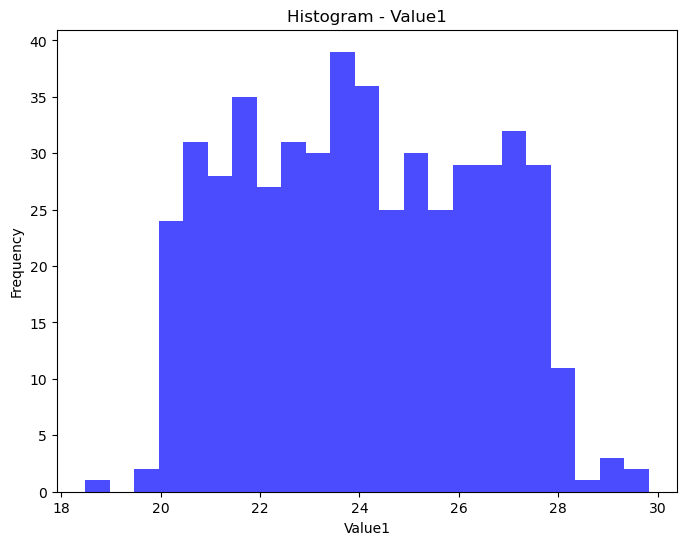

In [18]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def read_csv_data(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            time = int(row[0])
            value1 = float(row[1])
            value2 = float(row[2])
            value3 = float(row[3])
            data.append((time, value1, value2, value3))
    return data

def generate_histogram(data):
    value1 = [point[1] for point in data]

    plt.figure(figsize=(8, 6))

    # Calculate number of bins using Sturges' rule
    num_bins = int(np.ceil(np.sqrt(len(value1))))

    # Generate histogram
    plt.hist(value1, bins=num_bins, color='blue', alpha=0.7)
    plt.xlabel('Value1')
    plt.ylabel('Frequency')
    plt.title('Histogram - Value1')

    plt.show()

# Exemple d'utilisation
data = read_csv_data('spc_data.csv')
generate_histogram(data)


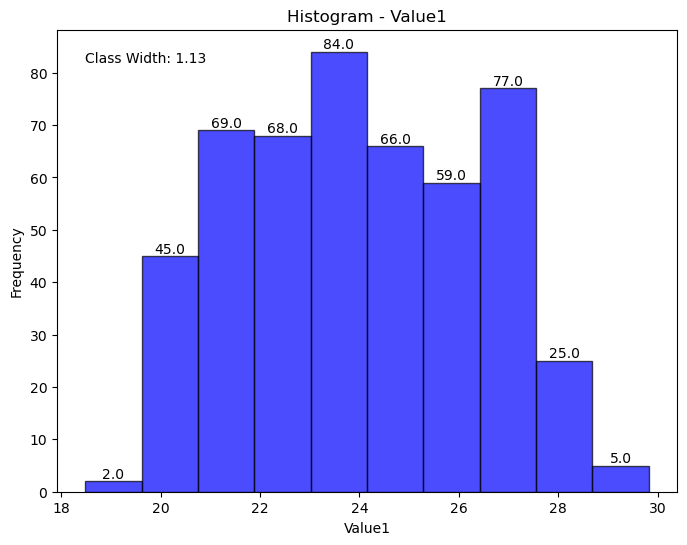

In [30]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math

def read_csv_data(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            time = int(row[0])
            value1 = float(row[1])
            value2 = float(row[2])
            value3 = float(row[3])
            data.append((time, value1, value2, value3))
    return data

def calculate_bins(data):
    n = len(data)
    k = math.ceil(1 + math.log2(n))
    return k

def generate_histogram(data):
    value1 = [point[1] for point in data]

    plt.figure(figsize=(8, 6))

    # Calculate number of bins (classes) using Sturges' rule
    k = calculate_bins(data)

    # Generate histogram plot with bar outlines
    hist, bins, _ = plt.hist(value1, bins=k, color='blue', alpha=0.7, edgecolor='black')
    plt.xlabel('Value1')
    plt.ylabel('Frequency')
    plt.title('Histogram - Value1')

    # Calculate and display class width
    class_width = bins[1] - bins[0]
    plt.text(bins[0], max(hist), f'Class Width: {class_width:.2f}', ha='left', va='top')

    # Display class count
    for i in range(len(bins) - 1):
        class_count = hist[i]
        class_center = (bins[i] + bins[i+1]) / 2  # Calculating the center of each class
        plt.text(class_center, hist[i], f'{class_count}', ha='center', va='bottom')

    plt.show()

# Exemple d'utilisation
data = read_csv_data('spc_data.csv')
generate_histogram(data)
